# Sales Analytics for Retail Business - EP 2 - Descriptive Analytics
ในบทความตอนที่แล้วเราได้ทำการเตรียมข้อมูลที่เราได้รับมาจากระบบ EPR ขององค์กร ซึ่งเป็นข้อมูลรายการขายสินค้าต่างๆตลอดปี 2019 และเราได้ตั้งคำถามเบื้องต้นไว้ 9 คำถาม ซึ่งส่วนมากจะเป็นคำถามโดยทั่วๆไปที่เราสามารถตั้งได้จากข้อมูลที่เรามองเห็นเบื้องต้น ในบทความตอนนี้เราก็จะมาลองวิเคราะห์ข้อมูลในรูปแบบของ Descriptive Analytics กันดูว่ามันจะสามารถวิเคราะห์ออกมาได้เป็นหน้าตาอย่างไรบ้าง เริ่มกันเลย

อันดับแรกเราก็จะมาเริ่มโหลดแพคเกจไลบรารี่ต่างๆของโปรแกรม Python ที่จำเป็นในการวิเคราะห์ครั้งนี้ และทำการสร้างฟังก์ชั่นสำหรับเรียกใช้งานในการสร้างกราฟเพื่อสะดวกในการทำงานที่ซ้ำๆ จะได้ไม่ต้องเขียนโปรแกรมมาก

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from plotgraphlib import plotgraph, varplotgraph, GDS
sb.set(font='TH Sarabun NEW')

%matplotlib inline
%config InlineBackend.figure_format='retina'

print(f'pandas version : {pd.__version__}')
print(f'matplotlib version : {matplotlib.__version__}')
print(f'seaborn version : {sb.__version__}')

pandas version : 1.0.3
matplotlib version : 3.2.1
seaborn version : 0.10.1


ต่อมาเราก็จะมากำหนดค่าเริ่มต้นให้กับโปรแกรมของเราดังต่อไปนี้

In [2]:
input_path = 'input/'
output_path = 'output/'
graph_path = 'graph/'
ds_cols = ['SHOWROOM', 'INV_DATE', 'INV_NO', 'ITEM_CODE', 'ITEM_NAME', 'QTY', 'PRICE', 'CUSTOMER']
sr_names = [['ONLINE', 0], ['SR01', 1], ['SR05', 2]]
q_names = [['QUARTER 1', 1], ['QUARTER 2', 2], ['QUARTER 3', 3], ['QUARTER 4', 4]]
m_names = [['JANUARY', 1], ['FEBRUARY', 2], ['MARCH', 3], ['APRIL', 4], ['MAY', 5], ['JUNE', 6],
           ['JULY', 7], ['AUGUST', 8], ['SEPTEMBER', 9], ['OCTOBER', 10], ['NOVEMBER', 11], ['DECEMBER', 12]]
d_names = [['MONDAY', 0], ['TUESDAY', 1], ['WEDNESDAY', 2], ['THURSDAY', 3], ['FRIDAY', 4], ['SATURDAY', 5], ['SUNDAY', 6]]

gds = GDS

คราวนี้เราก็จะมาเริ่มโหลดข้อมูลที่เราได้เตรียมไว้จากบทความที่แล้ว (EP 1) เข้ามาใช้งาน

In [3]:
df = pd.read_csv(f'{output_path}final_2019.csv',
                 parse_dates=['INV_DATE'],
                 header=0)
df.head(3)

,SHOWROOM,INV_DATE,INV_NO,ITEM_CODE,ITEM_NAME,QTY,PRICE,CUSTOMER,SR_CODE,INV_TYPE,SELL_TYPE,ITEM_TYPE,CUSTOMER_TYPE,INV_QUARTER,INV_MONTH,INV_WEEK_DAY,INV_MONTH_DAY
0,ONLINE,2019-09-23,CS-1256209/057,IG0681,"Callebaut Dark Chocolate Couverture 57.7% , 2.5kg",1.0,850.0,P13820,0,CS,PRODUCT,IG,P,3,9,0,23
1,ONLINE,2019-09-23,CS-1256209/057,IG0682,"Callebaut White Chocolate Couverture 28% ,2.5 kg",1.0,950.0,P13820,0,CS,PRODUCT,IG,P,3,9,0,23
2,ONLINE,2019-09-23,CS-1256209/057,PK0645,SYN Triangle Paper Gold Card 7x11 cm. (P/100) ...,1.0,90.0,P13820,0,CS,PRODUCT,PK,P,3,9,0,23


เมื่อเราโหลดข้อมูลเข้ามาเรียบร้อยแล้ว เรามาลองพล็อตข้อมูลบางส่วนที่เป็นตัวเลขออกมาดูในรูปแบบกราฟคร่าวๆได้ดังรูปต่อไปนี้

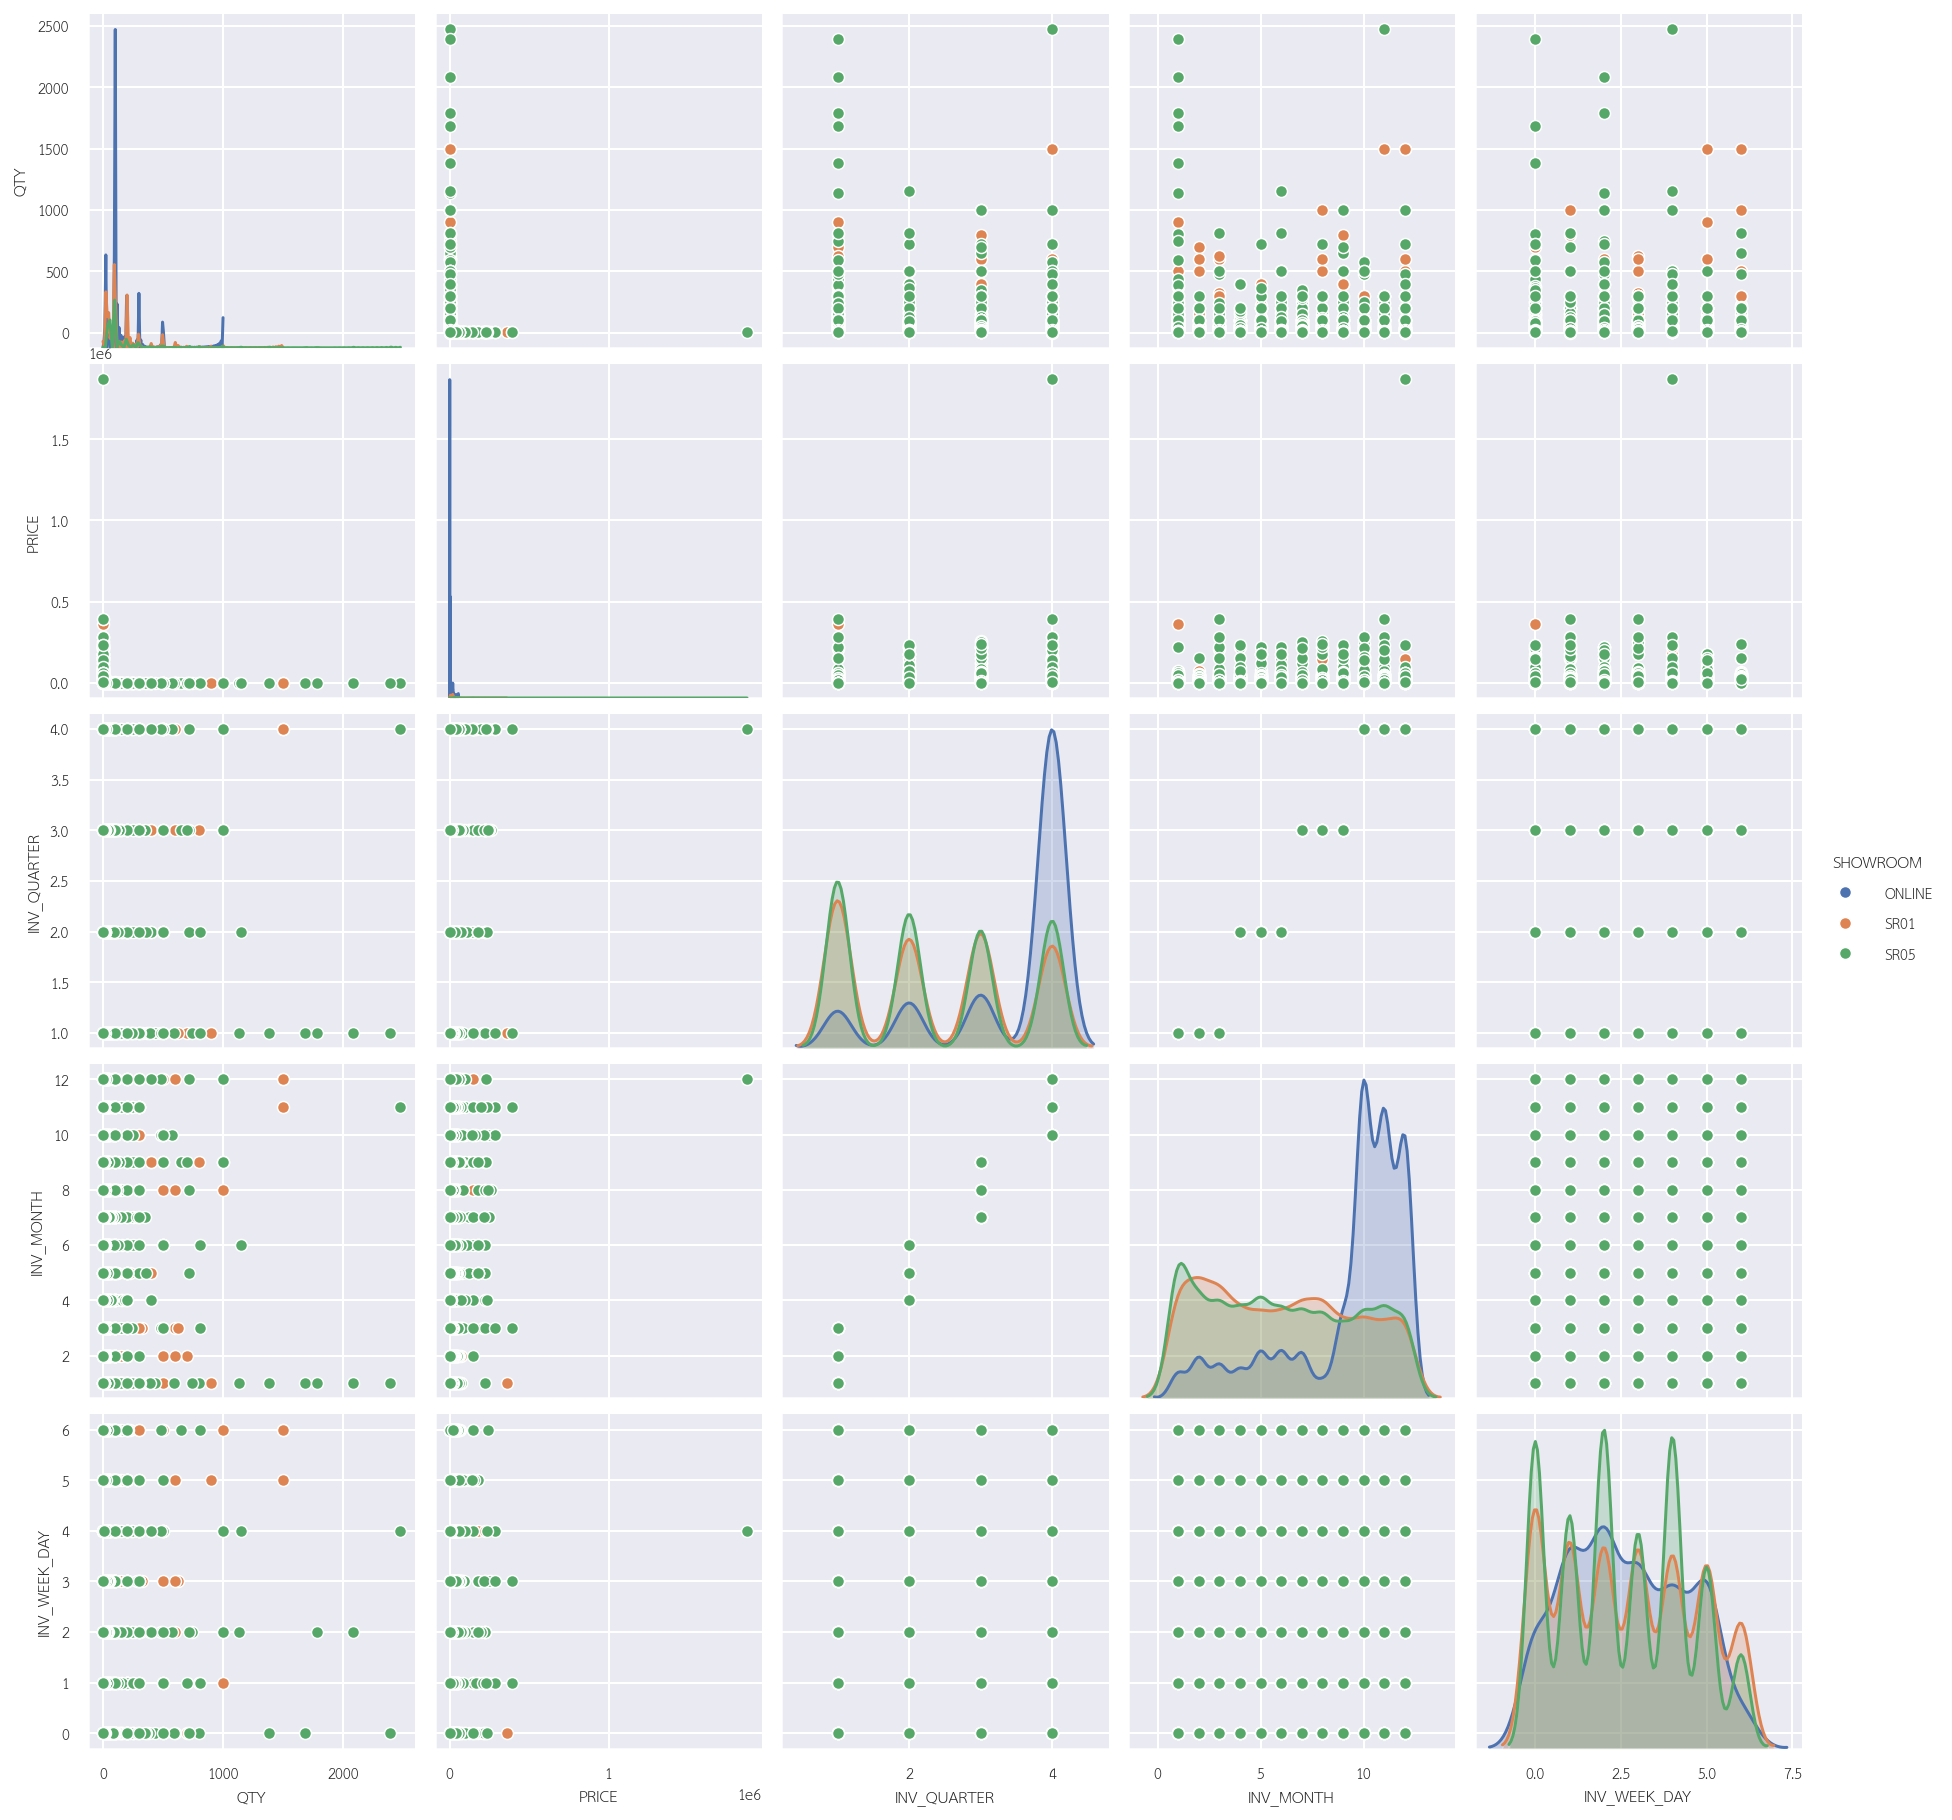

In [4]:
ax = sb.pairplot(data=df, vars=['QTY', 'PRICE', 'INV_QUARTER', 'INV_MONTH', 'INV_WEEK_DAY'], hue='SHOWROOM')

จากรูปเราจะพบว่ายอดขายและปริมาณที่ขายได้กระจายกันไปในทุกๆช่วงเวลา ซึ่งเราจะไปเจาะลึกกันในแต่ละช่วงเวลากันต่อไป อันดับต่อไปเราก็จะเริ่มวิเคราะห์ข้อมูลเพื่อตอบคำถามเบื้องต้นที่เราได้ตั้งไว้ จะขอทบทวนคำถามที่เราเคยได้ตั้งไว้เบื้องต้นดังต่อไปนี้
1. ยอดขายทั้งปีมีมูลค่าเป็นเท่าไหร่
2. จัดอันดับสินค้าที่ขายได้เป็นมูลค่ามากที่สุด
3. จัดอันดับสินค้าที่ขายได้เป็นจำนวนมากที่สุด
4. จัดอันดับลูกค้าที่ซื้อสินค้าเป็นมูลค่ามากที่สุด
5. จัดอันดับลูกค้าที่ซื้อสินค้าเป็นจำนวนมากที่สุด
6. จัดอันดับช่องทางการจัดจำหน่ายที่มีลูกค้าที่ซื้อสินค้าเป็นมูลค่ามากที่สุด
7. จัดอันดับช่องทางการจัดจำหน่ายที่มีลูกค้าที่ซื้อสินค้าเป็นจำนวนมากที่สุด
8. จัดอันดับช่วงเวลาต่างๆที่มีช่องทางการจัดจำหน่ายที่มีลูกค้าที่ซื้อสินค้าเป็นมูลค่ามากที่สุด
9. จัดอันดับช่วงเวลาต่างๆที่มีช่องทางการจัดจำหน่ายที่มีลูกค้าที่ซื้อสินค้าเป็นจำนวนมากที่สุด

In [5]:
print(f'Total Product Price : {round(df.PRICE.sum() / 1e6, 2)} M.Baht')

Total Product Price : 77.38 M.Baht


เราสามารถหาออกมาได้ว่าในปี 2019 บริษัทสามารถขายสินค้ามีมูลค่าทั้งสิ้น 77.38 ล้านบาท เราลองมาแจกแจงดูว่าในมูลค่าทั้งหมดนั้น แบ่งแยกตามชนิดการขายและบริการแต่ละแบบคิดเป็นมูลค่าเท่าไหร่กันบ้าง

In [6]:
df.groupby(['SELL_TYPE'])['PRICE'].sum()

SELL_TYPE
ADVERTISING     1871397.20
GUARANTEE        360000.00
LABOUR             2000.00
PRODUCT        71141507.47
RENTAL          1620000.00
SERVICE          304808.80
SPARE           2077993.50
Name: PRICE, dtype: float64

In [7]:
not_product = df.PRICE.sum() - df.groupby(['SELL_TYPE'])['PRICE'].sum()[3]
print(f'Total Another Service except Product Price : {round(not_product / 1e6, 2)} M.Baht')

Total Another Service except Product Price : 6.24 M.Baht


จากข้อมูลข้างบนเราจะพบว่า มูลค่าที่เกิดจากการขายสินค้าจริงๆอยู่ที่ 71.14 ล้านบาท ส่วนบริการอื่นๆคิดเป็นมูลค่ารวมกัน 6.24 ล้านบาท คราวนี้เรามาลองดูกันว่าตามมูลค่าดังกล่าวแล้ว จำนวนครั้งที่เกิดการซื้อขายของแต่ละบริการเป็นจำนวนเท่าไหร่บ้าง

In [8]:
df.groupby(['SELL_TYPE'])['PRICE'].count()

SELL_TYPE
ADVERTISING        1
GUARANTEE          1
LABOUR             2
PRODUCT        35802
RENTAL             9
SERVICE          230
SPARE            824
Name: PRICE, dtype: int64

จะพบว่าบริษัทขายสินค้า (PRODUCT) เป็นจำนวน 35,802 ครั้ง, จำหน่ายอะไหล่ (SPARE) เป็นจำนวน 824 ครั้ง, จำนวนงานริการรับซ๋อมสินค้า (SERVICE) เป็นจำนวน 230 ครั้ง, จำนวนบริการให้เช่า (RENTAL) เป็นจำนวน 9 ครั้ง, ค่าแรงงาน (LABOUR) คนงานเป็นจำนวน 2 ครั้ง และค่าโฆษณา (ADVERTISING) กับค่ารับประกันงาน (GUARANTEE) เป็นจำนวน 1 ครั้ง

In [9]:
df[df.SELL_TYPE == 'SERVICE'].describe()

,QTY,PRICE,SR_CODE,INV_QUARTER,INV_MONTH,INV_WEEK_DAY,INV_MONTH_DAY
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,1.013043,1325.255652,1.639130,2.630435,6.886957,2.556522,16.826087
std,0.113708,1582.585154,0.499116,1.239078,3.863987,1.886247,8.271866
min,1.000000,200.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,535.000000,1.000000,1.000000,3.000000,1.000000,11.000000
50%,1.000000,600.000000,2.000000,3.000000,7.000000,3.000000,17.000000
75%,1.000000,1200.000000,2.000000,4.000000,10.750000,4.000000,24.000000
max,2.000000,9000.000000,2.000000,4.000000,12.000000,6.000000,31.000000


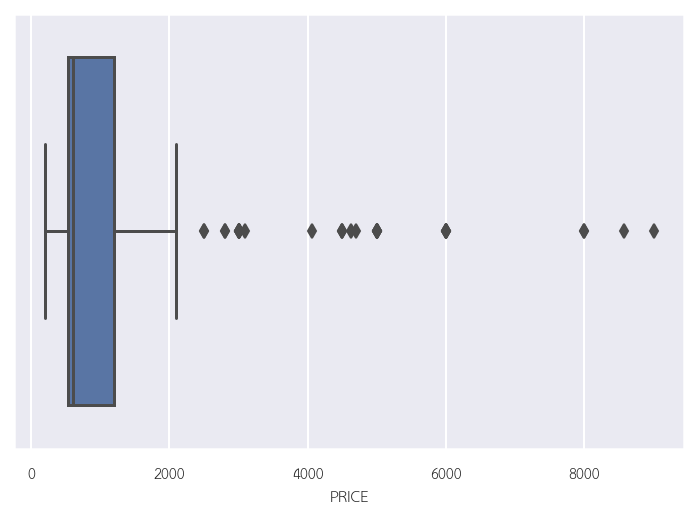

In [10]:
sb.boxplot(x=df[df.SELL_TYPE == 'SERVICE']['PRICE']);

In [11]:
df[df.SELL_TYPE == 'SERVICE']['PRICE'].median()

600.0

In [12]:
df[df.SELL_TYPE == 'SERVICE']['PRICE'].mode()

0    600.0
dtype: float64

เมื่อลองเจาะลึกลงไปในงานบริการรับซ่อมสินค้าจะพบว่ามีการรับซ่อมสินค้าเป็นมูลค่าเฉลี่ยราว 1,325 บาท แต่ถ้าเราลองนำข้อมูลราคาทั้งหมดของงานบริการรับซ่อมไปพล็อตกราฟ boxplot แล้วจะพบว่าเรามีข้อมูลที่เป็น outliner อยู่จำนวนหนึ่งซึ่งทำให้ค่าเฉลี่ยของมูลค่าทั้งหมดขยับขึ้นไป ดังนั้นการจะเลือกใช้ค่า Mean เป็นค่าเฉลี่ยของมูลค่าในกรณีนี้อาจจะดูไม่สมเหตุสมผลนัก เราจึงเลือกใช้ค่ามัธยฐาน (Median) เป็นค่ากลางแทนที่จะเลือกใช้ค่า (Mean) เป็นต่าเฉลี่ยในกรณีนี้ และเพื่อเป็นการยืนยันอย่างชัดเจนว่าค่า Median ที่ได้นั้นสอดคล้องกับความเป็นจริง เราจึงลองพิจารณาดูที่ค่าฐานนิยม (Mode) ก็ปรากฎว่าค่า mode หรือค่าที่เกิดซ้ำๆของจำนวนข้อมูลทั้งหมดนั้น ก็เป็นค่า 600 บาท เราจึงมั่นใจได้ว่าค่าเฉลี่ยที่แท้จริงจะอยู่ที่ราว 600 บาทนั่นเอง

In [13]:
df[df.SELL_TYPE == 'SPARE'].describe()

,QTY,PRICE,SR_CODE,INV_QUARTER,INV_MONTH,INV_WEEK_DAY,INV_MONTH_DAY
count,824.00000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,1.42233,2521.836772,1.917476,2.516990,6.597087,2.629854,15.969660
std,1.25053,4557.669923,0.284018,1.076515,3.351471,1.827329,8.524444
min,1.00000,60.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.00000,701.000000,2.000000,2.000000,4.000000,1.000000,9.000000
50%,1.00000,1350.000000,2.000000,3.000000,7.000000,2.000000,17.000000
75%,1.00000,2500.000000,2.000000,3.000000,9.000000,4.000000,23.000000
max,14.00000,74400.000000,2.000000,4.000000,12.000000,6.000000,31.000000


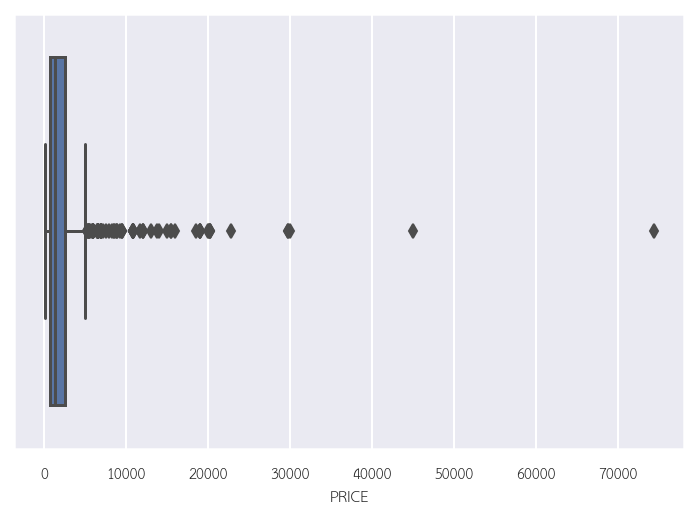

In [14]:
sb.boxplot(x=df[df.SELL_TYPE == 'SPARE']['PRICE']);

In [15]:
df[df.SELL_TYPE == 'SPARE']['PRICE'].median()

1350.0

จากนั้นเราลองวิเคราะห์แบบเดียวกันกับการจำหน่ายอะไหล่ดูบ้าง เราจะพบว่าค่าเฉลี่ยมูลค่าของอะไหล่ที่ขายอยู่ที่ 2,521 บาท แต่พอเราลองเอาราคาทั้งหมดไปพล็อตเป็น boxplot ดูก็จะพบว่าในข้อมูลมี outliner อยู่จำนวนหนึ่งที่ทำให้ค่าเฉลี่ยของมูลค่าผิดไปจากความเป็นจริง และถ้าพิจารณาดูจากค่า Median ก็จะพบว่าค่าเฉลี่ยของมูลค่าของอะไหล่จะอยู่ราวๆ 1,350 บาทเท่านั้นจึงจะเหมาะสม

เท่านี้เราก็สามารถตอบคำถามข้อที่ 1 ที่ว่ายอดขายทั้งปีมีมูลค่าเป็นเท่าไหร่ได้แล้ว คราวนี้เรามาลองตอบคำถามข้อ 2 และข้อ 3 กันดูว่าจะได้ออกมาอย่างไรบ้าง

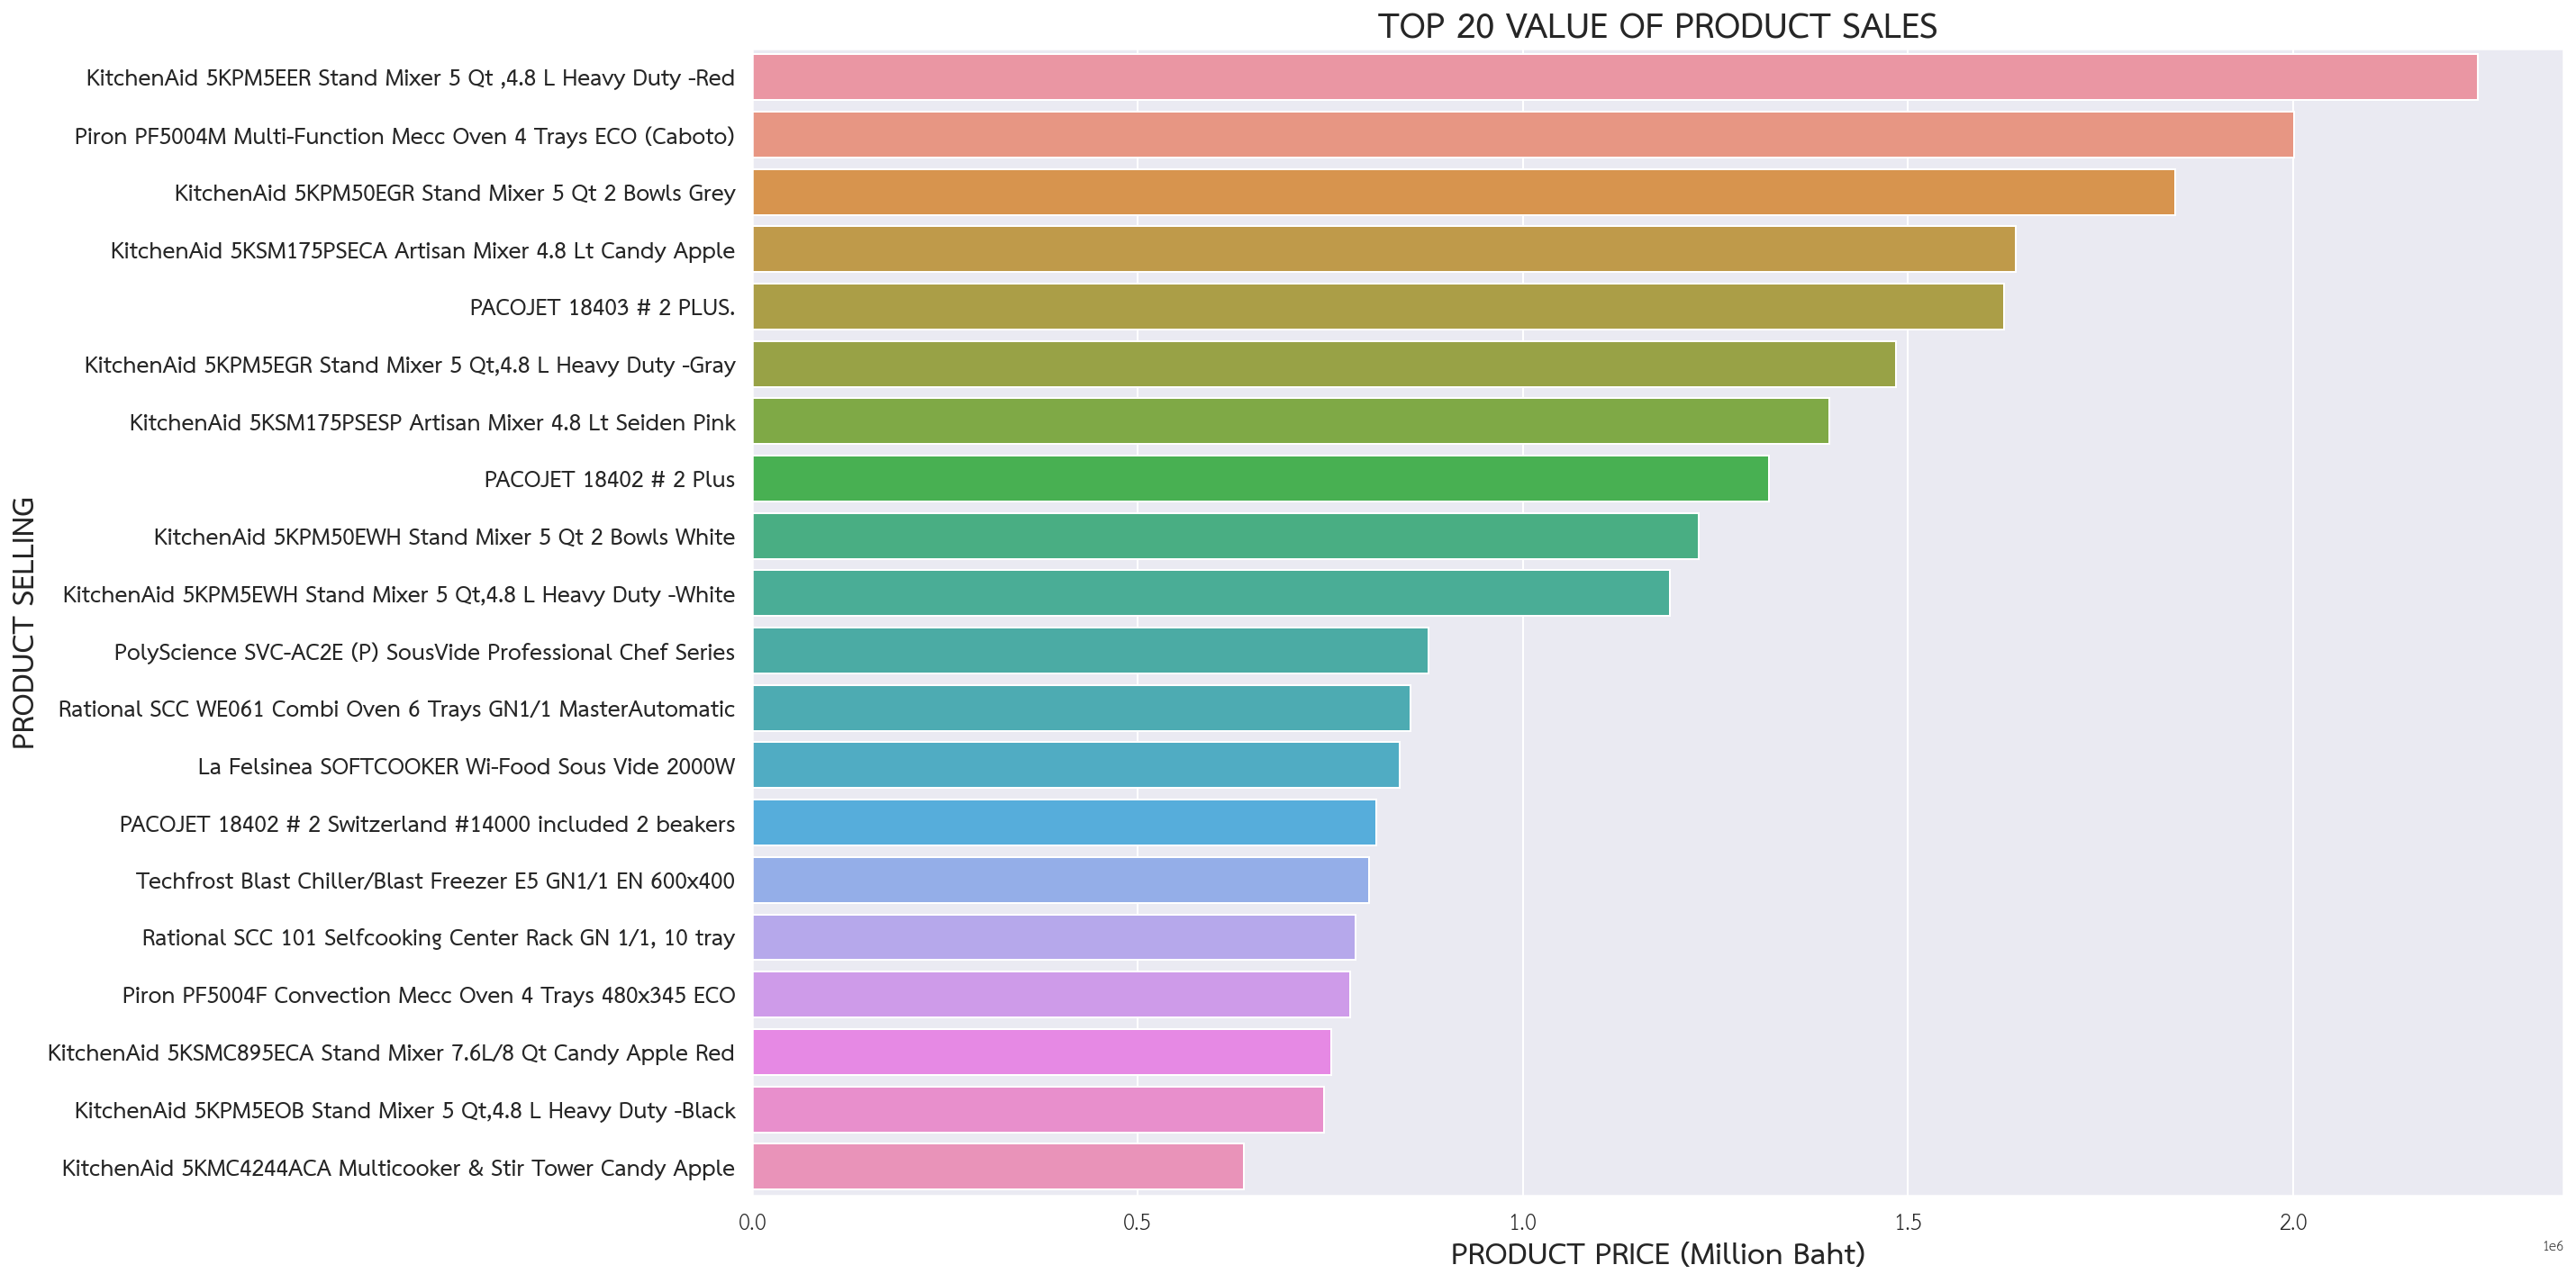

In [16]:
price20 = varplotgraph(df, ['VALUE', '1_Var'], gds)

In [17]:
price20

,ITEM_NAME,PRICE
1817,"KitchenAid 5KPM5EER Stand Mixer 5 Qt ,4.8 L He...",2239224.22
3194,Piron PF5004M Multi-Function Mecc Oven 4 Trays...,2001619.00
1815,KitchenAid 5KPM50EGR Stand Mixer 5 Qt 2 Bowls ...,1846794.68
1825,KitchenAid 5KSM175PSECA Artisan Mixer 4.8 Lt C...,1639536.25
2958,PACOJET 18403 # 2 PLUS.,1625000.00
1818,"KitchenAid 5KPM5EGR Stand Mixer 5 Qt,4.8 L Hea...",1484040.00
1838,KitchenAid 5KSM175PSESP Artisan Mixer 4.8 Lt S...,1397469.13
2956,PACOJET 18402 # 2 Plus,1320000.00
1816,KitchenAid 5KPM50EWH Stand Mixer 5 Qt 2 Bowls ...,1228461.26
1820,"KitchenAid 5KPM5EWH Stand Mixer 5 Qt,4.8 L Hea...",1190637.00


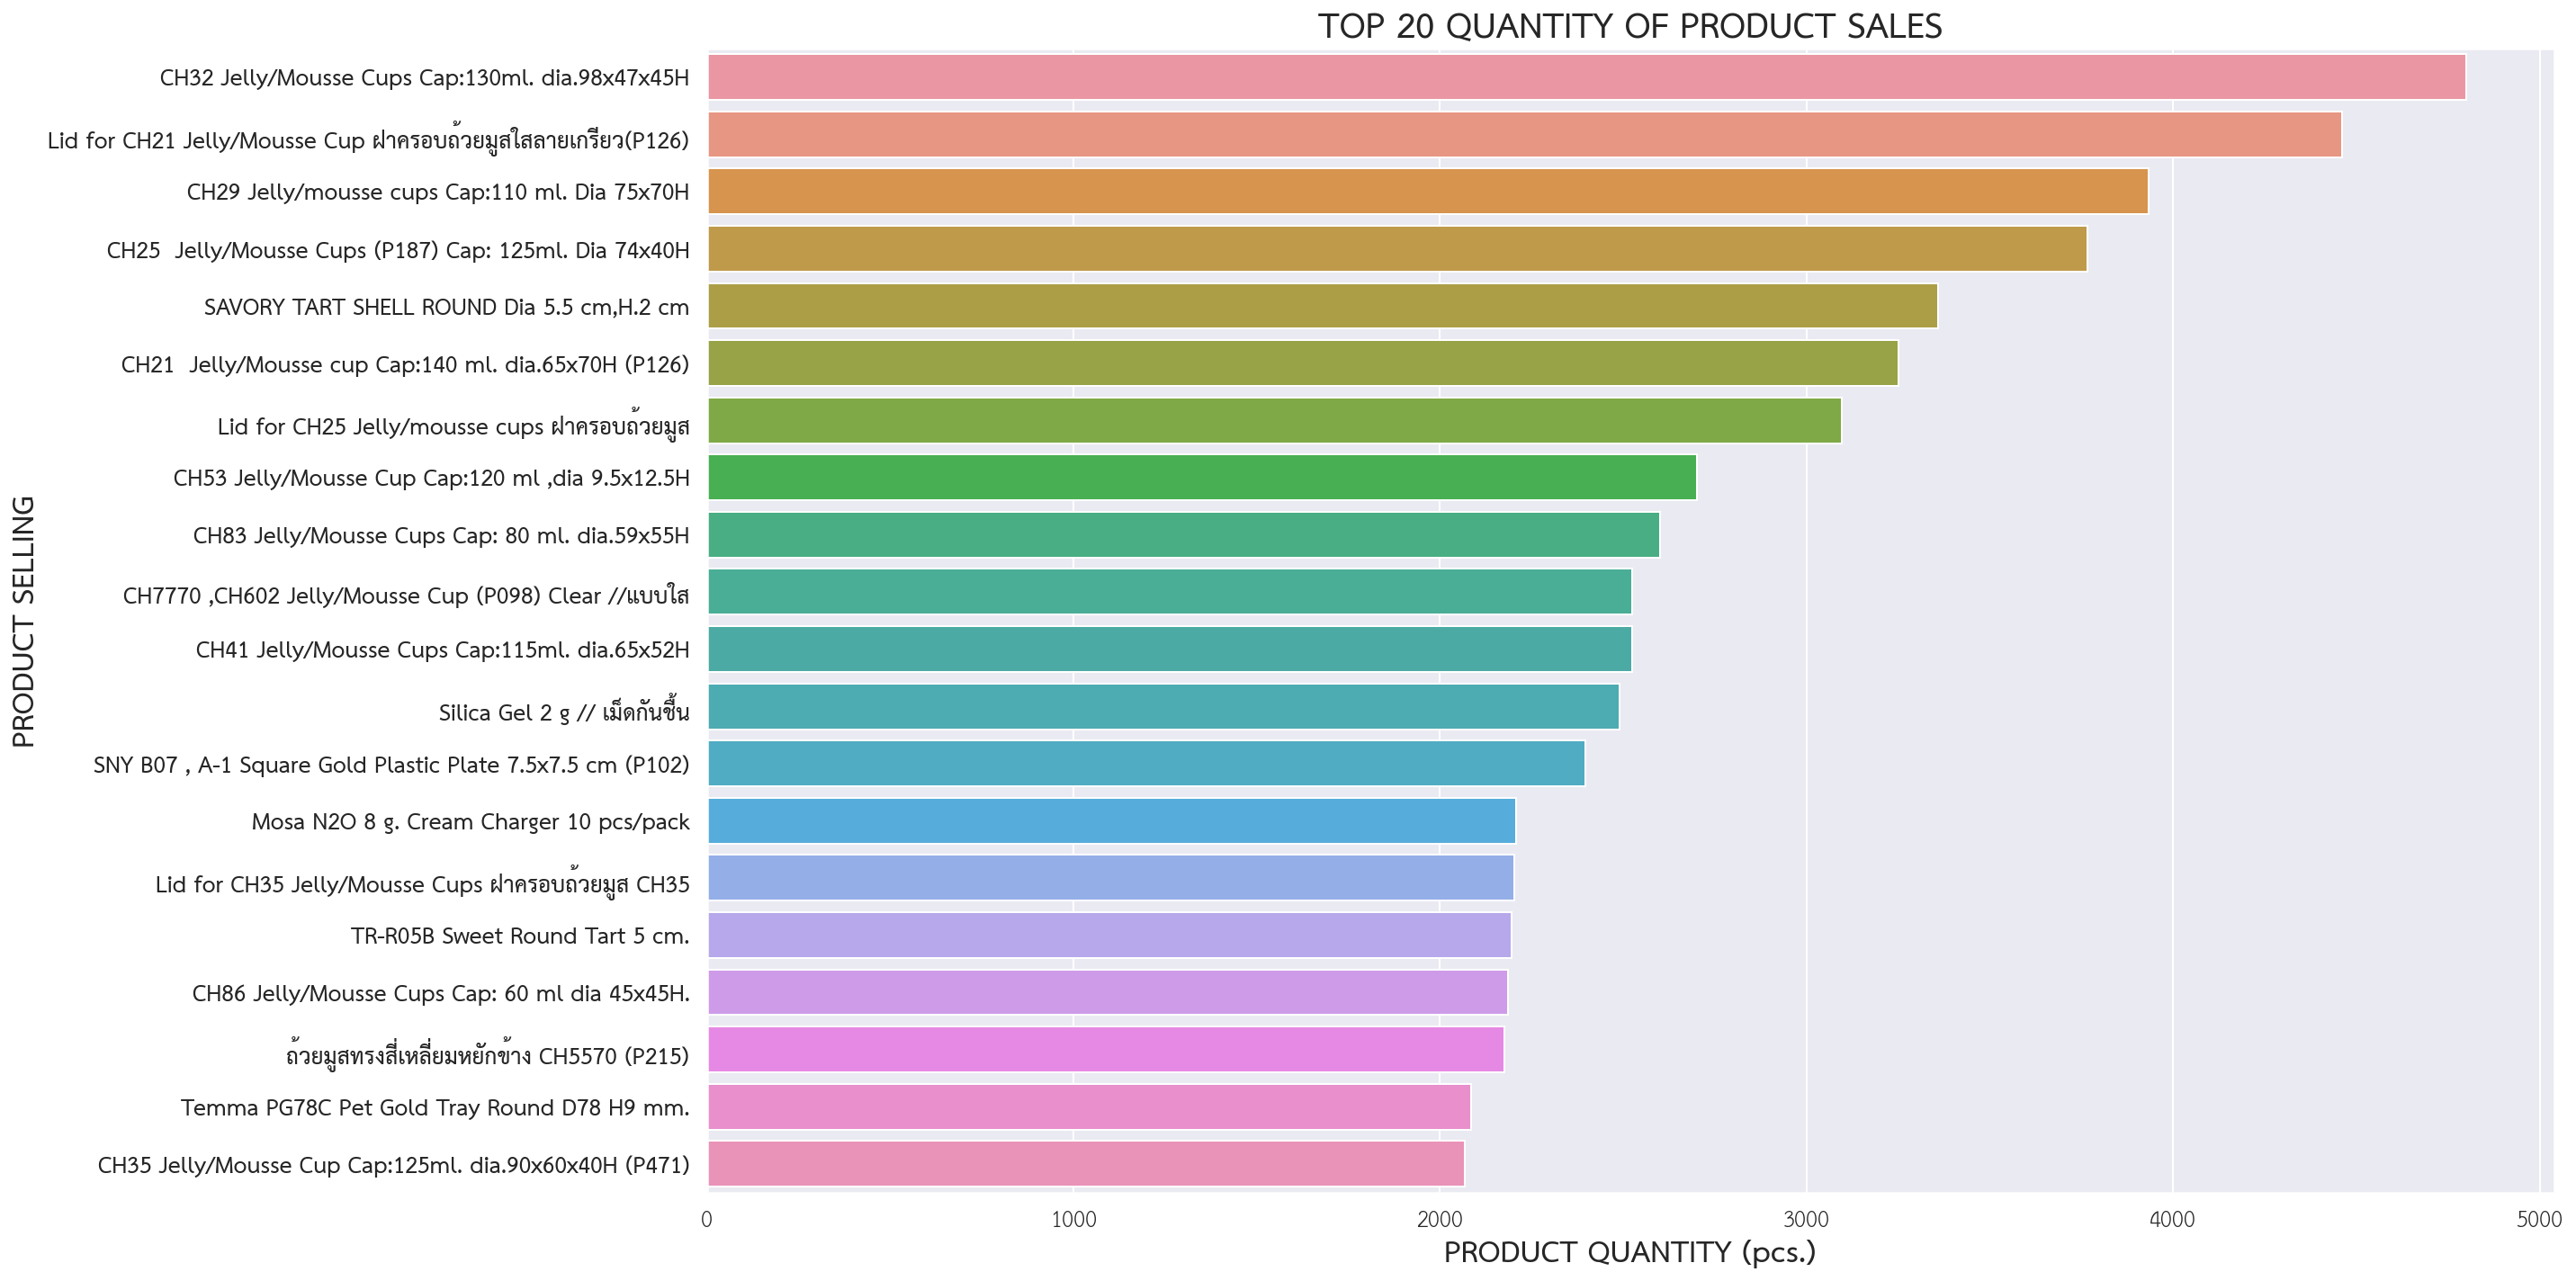

In [18]:
qty20 = varplotgraph(df, ['QTY', '1_Var'], gds)

In [19]:
qty20

,ITEM_NAME,QTY
926,CH32 Jelly/Mousse Cups Cap:130ml. dia.98x47x45H,4800.0
2061,Lid for CH21 Jelly/Mousse Cup ฝาครอบถ้วยมูสใสล...,4460.0
925,CH29 Jelly/mousse cups Cap:110 ml. Dia 75x70H,3934.0
921,CH25 Jelly/Mousse Cups (P187) Cap: 125ml. Dia...,3767.0
3479,"SAVORY TART SHELL ROUND Dia 5.5 cm,H.2 cm",3360.0
918,CH21 Jelly/Mousse cup Cap:140 ml. dia.65x70H ...,3251.0
2063,Lid for CH25 Jelly/mousse cups ฝาครอบถ้วยมูส,3095.0
941,"CH53 Jelly/Mousse Cup Cap:120 ml ,dia 9.5x12.5H",2700.0
953,CH83 Jelly/Mousse Cups Cap: 80 ml. dia.59x55H,2601.0
951,"CH7770 ,CH602 Jelly/Mousse Cup (P098) Clear //...",2525.0


จากรูปด้านบนเราก็จะสามารถตอบคำถามข้อ 2 และข้อ 3 ได้ว่า 20 อันดับแรกของแต่ละคำถามคืออะไร จากนี้ต่อไปเราลองมาหาคำตอบให้ข้อ 4 และข้อ 5 กันดูบ้างว่าจะออกมาเป็นอย่างไร

ลูกค้าที่ซื้อสินค้ามีมูลค่ามากที่สุด 20 อันดับเป็นดังรูปต่อไปนี้

In [20]:
df[df.SELL_TYPE == 'PRODUCT'].groupby(['CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values('PRICE', ascending=False).head(20)

,CUSTOMER,PRICE
89,C0161,15284266.67
97,C0234,1729456.00
967,D0034,1677977.00
248,C1295,708652.60
539,C2195,685656.00
332,C1742,658500.00
3771,R0417,649412.00
478,C2102,540800.00
140,C0567,504218.00
3774,R0422,488430.00


ลูกค้าที่ซื้อสินค้ามีจำนวนมากที่สุด 20 อันดับเป็นดังรูปต่อไปนี้

In [21]:
df[df.SELL_TYPE == 'PRODUCT'].groupby(['CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values('QTY', ascending=False).head(20)

,CUSTOMER,QTY
89,C0161,71287.0
967,D0034,6624.0
1661,P12631,4041.0
3451,P5692,3601.0
3769,R0413,3280.0
1147,P10200,2601.0
1135,P0981,2436.0
323,C1698,2223.0
158,C0675,2211.0
3530,P7259,2012.0


จากรูปด้านบนเราจะสามารถตอบคำถามข้อ 4 และข้อ 5 ได้ดังรูป แต่จะมีจุดที่น่าสงสัยอย่างหนึ่งของคำตอบที่ได้ทั้ง 2 ข้อคือ ลูกค้ารหัส C0161 คือใคร ทำไมรายการซื้อขายจึงโดดไปจากลูกค้ารายอื่นเอามากๆ เมื่อสอบถามไปยังเจ้าหน้าที่ในส่วนปฏิบัติงานก็พบว่า ลูกค้ารายนี้คือลูกค้าที่ถูกสร้างขึ้นมาเพื่อการขายภายในองค์กร ส่วนสาเหตุที่แท้จริงว่าทำไมจึงต้องสร้างลูกค้าลักษณะนี้ขึ้นเพื่อทำการซื้อขายนั้น เราคงต้องไปหาคำตอบเอาเองภายในองค์กร ซึ่งจะไม่ขอกล่าวในบทความนี้

ขั้นตอนต่อไปเราจะมาหาคำตอบของคำถามเบื้องต้นข้อ 6 และข้อ 7 กันว่าจะออกมาเป็นอย่างไร โดยเราจะทำการแบ่งช่องทางการจัดจำหน่ายออกเป็น 3 ช่องทางได้แก่ ONLINE, SR01, SR05 ตามลำดับ

ช่องทางการจัดจำหน่าย ONLINE จะได้ข้อมูลมูลค่าที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [22]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'ONLINE')].groupby(['SHOWROOM', 'CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values(['PRICE'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,PRICE
23,ONLINE,C2670,88900.0
148,ONLINE,P13982,55000.0
9,ONLINE,C1632,38000.0
200,ONLINE,P14140,32900.0
341,ONLINE,P6213,26340.0
31,ONLINE,C2744,25800.0
248,ONLINE,P14246,21975.0
309,ONLINE,P14477,20900.0
257,ONLINE,P14269,19900.0
273,ONLINE,P14345,19900.0


ช่องทางการจัดจำหน่าย SR01 จะได้ข้อมูลมูลค่าที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [23]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR01')].groupby(['SHOWROOM', 'CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values(['PRICE'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,PRICE
539,SR01,D0034,409864.10
381,SR01,C2163,272200.00
429,SR01,C2259,241200.00
27,SR01,A0448,239380.00
58,SR01,C0109,224849.00
31,SR01,A0496,203543.00
216,SR01,C1658,171930.00
481,SR01,C2510,169008.13
1419,SR01,P13109,145000.00
1555,SR01,P13337,145000.00


ช่องทางการจัดจำหน่าย SR05 จะได้ข้อมูลมูลค่าที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [24]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR05')].groupby(['SHOWROOM', 'CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values(['PRICE'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,PRICE
44,SR05,C0161,15281766.67
48,SR05,C0234,1695346.00
577,SR05,D0034,1268112.90
144,SR05,C1295,708652.60
262,SR05,C2195,685466.00
194,SR05,C1742,658500.00
1885,SR05,R0417,631502.00
241,SR05,C2102,540800.00
1887,SR05,R0422,488430.00
448,SR05,C2552,488300.00


ช่องทางการจัดจำหน่าย ONLINE จะได้ข้อมูลจำนวนที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [25]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'ONLINE')].groupby(['SHOWROOM', 'CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values(['QTY'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,QTY
353,ONLINE,P7259,1006.0
42,ONLINE,P0981,1006.0
204,ONLINE,P14147,603.0
103,ONLINE,P13541,407.0
84,ONLINE,P12424,401.0
173,ONLINE,P14049,208.0
379,ONLINE,R0408,200.0
336,ONLINE,P5918,200.0
328,ONLINE,P4114,200.0
203,ONLINE,P14146,200.0


ช่องทางการจัดจำหน่าย SR01 จะได้ข้อมูลจำนวนที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [26]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR01')].groupby(['SHOWROOM', 'CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values(['QTY'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,QTY
1060,SR01,P12631,4041.0
1995,SR01,P5692,3601.0
669,SR01,P10200,2001.0
1668,SR01,P13598,2000.0
27,SR01,A0448,1711.0
219,SR01,C1698,1558.0
1974,SR01,P5111,1501.0
390,SR01,C2183,1421.0
539,SR01,D0034,1371.0
2245,SR01,R0415,1192.0


ช่องทางการจัดจำหน่าย SR05 จะได้ข้อมูลจำนวนที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [27]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR05')].groupby(['SHOWROOM', 'CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values(['QTY'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,QTY
44,SR05,C0161,71280.0
577,SR05,D0034,5253.0
1883,SR05,R0413,3280.0
85,SR05,C0675,2206.0
659,SR05,P0981,1430.0
1813,SR05,P8853,1303.0
1839,SR05,R0008,1135.0
1853,SR05,R0160,1078.0
1871,SR05,R0353,1008.0
1790,SR05,P7259,1006.0


และเป็นที่แน่นอนว่าเราจะพบเจอลูกค้ารหัส C0161 ที่ช่องทางจัดจำหน่าย SR05 เนื่องจากเป็นสำนักงานใหญ่ และรายการขายที่เกิดขึ้นก็เกิดจากการกระทำของเจ้าหน้าที่ในสำนักงานใหญ่ทั้งสิ้น

มาถึงตรงนี้เราจะเหลือคำตอบให้กับคำถามพื้นฐานอีก 2 ข้อคือข้อ 8 และข้อ 9 มาดูกันว่าจะออกมาเป็นอย่างไร

ในไตรมาสที่ 1 ของปี 2019 ช่องทางการจัดจำหน่าย ONLINE จะได้ข้อมูลมูลค่าที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [28]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'ONLINE') & (df.INV_QUARTER == 1)].groupby(['SHOWROOM', 'CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values(['PRICE'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,PRICE
20,ONLINE,P14060,6900.0
31,ONLINE,P6037,3500.0
33,ONLINE,P7544,3120.0
11,ONLINE,P13879,3115.0
0,ONLINE,C1184,2960.0
14,ONLINE,P13891,2650.0
35,ONLINE,P9399,2605.0
10,ONLINE,P13604,2250.0
15,ONLINE,P13892,2200.0
38,ONLINE,WL00090,1955.0


ในไตรมาสที่ 1 ของปี 2019 ช่องทางการจัดจำหน่าย SR01 จะได้ข้อมูลมูลค่าที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [29]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR01') & df.INV_QUARTER == 1].groupby(['SHOWROOM', 'CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values(['PRICE'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,PRICE
301,SR01,C2259,234300.00
357,SR01,D0034,230303.60
279,SR01,C2163,222200.00
41,SR01,C0109,201770.00
21,SR01,A0496,185683.00
960,SR01,P13109,145000.00
828,SR01,P12783,142700.00
931,SR01,P12978,117450.00
18,SR01,A0448,111490.00
121,SR01,C1277,96085.00


ในไตรมาสที่ 1 ของปี 2019 ช่องทางการจัดจำหน่าย SR05 จะได้ข้อมูลมูลค่าที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [30]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR05') & df.INV_QUARTER == 1].groupby(['SHOWROOM', 'CUSTOMER'])['PRICE'].sum().to_frame().reset_index().sort_values(['PRICE'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,PRICE
28,SR05,C0161,8959766.52
31,SR05,C0234,691152.00
164,SR05,C2195,685466.00
90,SR05,C1295,623240.00
340,SR05,D0034,546987.60
46,SR05,C0567,378511.00
6,SR05,A0282,285000.00
342,SR05,D0044,275858.00
383,SR05,N000001,260350.00
997,SR05,R0356,250000.00


ในไตรมาสที่ 1 ของปี 2019 ช่องทางการจัดจำหน่าย ONLINE จะได้ข้อมูลจำนวนที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [31]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'ONLINE') & (df.INV_QUARTER == 1)].groupby(['SHOWROOM', 'CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values(['QTY'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,QTY
24,ONLINE,P14244,200.0
0,ONLINE,C1184,15.0
37,ONLINE,P9579,12.0
33,ONLINE,P7544,9.0
18,ONLINE,P14018,9.0
8,ONLINE,P11219,7.0
5,ONLINE,P10319,7.0
36,ONLINE,P9529,6.0
38,ONLINE,WL00090,6.0
27,ONLINE,P14251,5.0


ในไตรมาสที่ 1 ของปี 2019 ช่องทางการจัดจำหน่าย SR01 จะได้ข้อมูลจำนวนที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [32]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR01') & (df.INV_QUARTER == 1)].groupby(['SHOWROOM', 'CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values(['QTY'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,QTY
822,SR01,P5692,1401.0
278,SR01,P0477,950.0
163,SR01,C2009,900.0
236,SR01,D0034,802.0
50,SR01,C0505,600.0
15,SR01,A0448,573.0
70,SR01,C1025,500.0
808,SR01,P4051,500.0
28,SR01,C0018,487.0
950,SR01,R0415,480.0


ในไตรมาสที่ 1 ของปี 2019 ช่องทางการจัดจำหน่าย SR05 จะได้ข้อมูลจำนวนที่เกิดจากลูกค้าที่ซื้อสูงสุด 20 อันดับดังรูปต่อไปนี้

In [33]:
df[(df.SELL_TYPE == 'PRODUCT') & (df.SHOWROOM == 'SR05') & (df.INV_QUARTER == 1)].groupby(['SHOWROOM', 'CUSTOMER'])['QTY'].sum().to_frame().reset_index().sort_values(['QTY'], ascending=False).head(20)

,SHOWROOM,CUSTOMER,QTY
10,SR05,C0161,36302.0
126,SR05,D0034,1338.0
20,SR05,C0675,820.0
17,SR05,C0567,392.0
368,SR05,R0008,322.0
58,SR05,C1903,247.0
382,SR05,R0413,240.0
335,SR05,P14244,200.0
373,SR05,R0200,185.0
148,SR05,P10200,184.0


และทั้งหมดนี้เป็นเพียงตัวอย่างในการทำ Descriptive Analytics ที่เราสามารถตอบคำถามเบื้องต้นจากข้อมูลที่เราได้รับมา เรายังสามารถวิเคราะห์ลงลึกเพื่อเข้าไปหาอินไซด์บางอย่างจากข้อมูลได้อย่างมากมาย ซึ่งจะขอกล่าวต่อไปในบทควาต่างๆของซีรีย์ Sales Analytics for Retail Business